### 2.5 데이터프레임 데이터 조작

In [175]:
import numpy as np
import pandas as pd

- 데이터 갯수 세기: count()

In [176]:
np.random.seed(2)
df = pd.DataFrame(np.random.randint(5, size=(4, 4)), dtype=float)
df.iloc[2, 3] = np.nan
df

,0,1,2,3
0,0.0,0.0,3.0,2.0
1,3.0,0.0,2.0,1.0
2,3.0,2.0,4.0,NaN
3,4.0,3.0,4.0,2.0


In [177]:
df.count() # 열 별로 NaN이 아닌 값의 갯수 세기

0    4
1    4
2    4
3    3
dtype: int64

In [178]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.tail(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


- 연습 문제 4.4.1

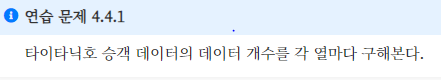

In [179]:
titanic.count()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

- 카테고리값 세기: value_counts()

In [180]:
titanic['class'].value_counts()     # 예약어는 []를 사용해야한다.

Third     491
First     216
Second    184
Name: class, dtype: int64

In [181]:
titanic.embark_town.value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

- 정렬: sort_values(), sort_index()

In [182]:
np.random.seed(2023)
df = pd.DataFrame(np.random.randint(40, 101, size=(4, 5)),
                    index=list('abcd'), columns=list('VWXYZ'))
df

,V,W,X,Y,Z
a,63,65,46,95,73
b,68,43,92,92,62
c,77,72,62,57,87
d,93,87,53,79,45


In [183]:
# W 컬럼 오름차순 기준
df.sort_values(by='W')

,V,W,X,Y,Z
b,68,43,92,92,62
a,63,65,46,95,73
c,77,72,62,57,87
d,93,87,53,79,45


In [184]:
# Y 컬럼 내림차순 기준, Y 컬럼에 동일한 값이 있으며 Z 컬럼의 내림차순
df2 = df.sort_values(by=['Y','Z'], ascending=False)
df2

,V,W,X,Y,Z
a,63,65,46,95,73
b,68,43,92,92,62
d,93,87,53,79,45
c,77,72,62,57,87


In [185]:
df2.sort_index()

,V,W,X,Y,Z
a,63,65,46,95,73
b,68,43,92,92,62
c,77,72,62,57,87
d,93,87,53,79,45


- 연습 문제 4.4.2

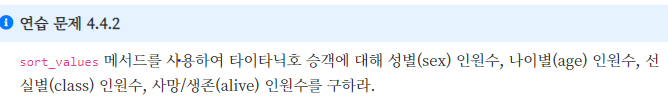

In [186]:
print(titanic.sex.value_counts())
print(titanic.alive.value_counts())

male      577
female    314
Name: sex, dtype: int64
no     549
yes    342
Name: alive, dtype: int64


In [187]:
# 연속적인 값에 대해서 value_counts()를 하는 것은 바람직하지 않음
titanic.age.value_counts().head()

24.0    30
22.0    27
18.0    26
19.0    25
28.0    25
Name: age, dtype: int64

- 행/열 합계

In [188]:
df

,V,W,X,Y,Z
a,63,65,46,95,73
b,68,43,92,92,62
c,77,72,62,57,87
d,93,87,53,79,45


In [189]:
# 행의 합계
df['행합계'] = df.sum(axis=1)
df

,V,W,X,Y,Z,행합계
a,63,65,46,95,73,342
b,68,43,92,92,62,357
c,77,72,62,57,87,355
d,93,87,53,79,45,357


In [190]:
# 행의 평균
df['행평균'] = df[list('VWXYZ')].mean(axis=1)
df

,V,W,X,Y,Z,행합계,행평균
a,63,65,46,95,73,342,68.4
b,68,43,92,92,62,357,71.4
c,77,72,62,57,87,355,71.0
d,93,87,53,79,45,357,71.4


In [191]:
# 행의 평균2
df['행평균2'] = df.iloc[:,:5].mean(axis=1)
df

,V,W,X,Y,Z,행합계,행평균,행평균2
a,63,65,46,95,73,342,68.4,68.4
b,68,43,92,92,62,357,71.4,71.4
c,77,72,62,57,87,355,71.0,71.0
d,93,87,53,79,45,357,71.4,71.4


In [192]:
# 행 추가하는 방법: 열 합계
df.loc['열합계', :] = df.sum(axis=0)
df

,V,W,X,Y,Z,행합계,행평균,행평균2
a,63.0,65.0,46.0,95.0,73.0,342.0,68.4,68.4
b,68.0,43.0,92.0,92.0,62.0,357.0,71.4,71.4
c,77.0,72.0,62.0,57.0,87.0,355.0,71.0,71.0
d,93.0,87.0,53.0,79.0,45.0,357.0,71.4,71.4
열합계,301.0,267.0,253.0,323.0,267.0,1411.0,282.2,282.2


- 연습 문제 4.4.3

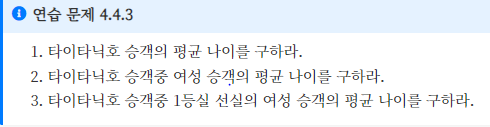

In [193]:
# 1. 타이타닉호  승객의 평균 나이를 구하라.
titanic.age.mean().round(2)

29.7

In [194]:
# 2. 타이타닉호 승갹중 여성 승객의 평균나이를 구하라.
tf = titanic[titanic.sex == 'female']        #filtering
tf.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False


In [195]:
titanic[titanic.sex == 'female'].age.mean().round(2)     



27.92

In [196]:
# 3. 타이타닉호 승객중 1등실 선실의 여성 승객의 평균 나이를 구하라.
tf1 = tf[tf.pclass == 1]
tf1.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [197]:
tf1.age.mean().round(2)


34.61

In [198]:
titanic[(titanic.pclass == 1) & (titanic.sex == 'female')].age.mean().round(2)

34.61

- apply 변환

- df.apply( lambda x:)              x는 열을 뜻한다.
- df.sex.apply(lambda x:)           x는 시리즈의 하나의 element가 된다.

In [199]:
np.random.seed(2023)
df = pd.DataFrame(np.random.randint(40, 101, size=(4, 5)),
                    index=list('abcd'), columns=list('VWXYZ'))
df

,V,W,X,Y,Z
a,63,65,46,95,73
b,68,43,92,92,62
c,77,72,62,57,87
d,93,87,53,79,45


In [200]:
# 각 열에서 최댓값 - 최솟값 한 결과
df.apply(lambda x : x.max() - x.min())      # x는 각 columns을 의미

V    30
W    44
X    46
Y    38
Z    42
dtype: int64

In [201]:
# V 열의 제곱수
df.V.apply(lambda x: x * x)     # x는 V 열의 각 엘리먼트

a    3969
b    4624
c    5929
d    8649
Name: V, dtype: int64

- map(함수, 리스트)
- series/DF
    - series.apply(함수)
    - DF.apply(함수) -> x는 열이다.
    - DF.apply(함수, axis=1) -> x는 행이다
- 한줄에 만들수 없으면 함수를 만들어야 하고 한줄에 만들 수 있으면 그렇게하라(?) 

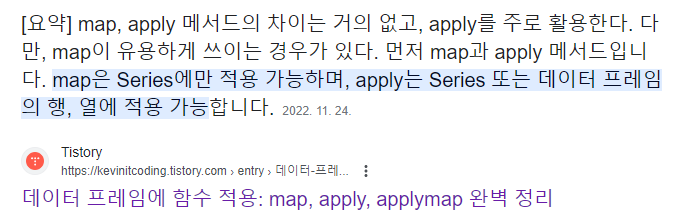

https://kevinitcoding.tistory.com/entry/%EB%8D%B0%EC%9D%B4%ED%84%B0-%ED%94%84%EB%A0%88%EC%9E%84%EC%97%90-%ED%95%A8%EC%88%98-%EC%A0%81%EC%9A%A9-map-apply-applymap-%EC%99%84%EB%B2%BD-%EC%A0%95%EB%A6%AC

In [202]:
# 각 행의 최댓값 - 최솟값 한 결과 - axis = 1을 주면 됨
df.apply(lambda x : x.max() - x.min(), axis=1)  # x는 각 행을 의미

a    49
b    49
c    30
d    48
dtype: int64

In [203]:
# 타이타닉호의 승객 중 나이 20살을 기준으로 성인(adult)과 미성년자(child)를 구별
titanic['adult/child'] = titanic.apply(lambda x: 'adult' if x.age >= 20 else 'child', axis=1)
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult/child
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,adult
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,child
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,child
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,adult
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,adult


- 연습 문제 4.4.4

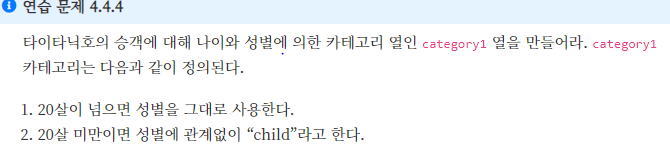

In [204]:
# 1.20살이 넘으면 성별을 그대로 사용한다.
# 2. 20살 미만이면 성별에 관계없이 “child”라고 한다
titanic['category1'] = titanic.apply(lambda x: x.sex if x.age >= 20 else 'child', axis=1)
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult/child,category1
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,adult,male
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,child,child
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,child,child
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,adult,male
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,adult,male


In [205]:
data = {
    'text': ['03.입출력.ipynb','04.고급인덱싱.ipynb','05.데이터조작.ipynb'],
    'price': ['24,000', '36,000', '42,000']
}
df1 = pd.DataFrame(data)
df1

,text,price
0,03.입출력.ipynb,"24,000"
1,04.고급인덱싱.ipynb,"36,000"
2,05.데이터조작.ipynb,"42,000"


In [206]:
# 구둣점 제거 열 생성
df1['구둣점 제거'] = df1.text.apply(lambda x: x.replace('.',''))       #apply는  적용을 뜻한다(?)
df1

,text,price,구둣점 제거
0,03.입출력.ipynb,"24,000",03입출력ipynb
1,04.고급인덱싱.ipynb,"36,000",04고급인덱싱ipynb
2,05.데이터조작.ipynb,"42,000",05데이터조작ipynb


In [207]:
# 한글 텍스트 열 생성
# df1['한글 텍스트'] = df1.text.apply(lambda x: x.replace('[ㄱ-ㅎㅏ-ㅣ가-힣]',''))      # 한글만 사용하고싶으면 정규표현식
df1['한글 텍스트'] = df1.text.str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]','', regex=True) 
df1

,text,price,구둣점 제거,한글 텍스트
0,03.입출력.ipynb,"24,000",03입출력ipynb,입출력
1,04.고급인덱싱.ipynb,"36,000",04고급인덱싱ipynb,고급인덱싱
2,05.데이터조작.ipynb,"42,000",05데이터조작ipynb,데이터조작


In [208]:
# price 문자열을 정수로 변환하여 가격 열 생성
df1['가격'] = df1.price.apply(lambda x: int(x.replace(',','')))
df1

,text,price,구둣점 제거,한글 텍스트,가격
0,03.입출력.ipynb,"24,000",03입출력ipynb,입출력,24000
1,04.고급인덱싱.ipynb,"36,000",04고급인덱싱ipynb,고급인덱싱,36000
2,05.데이터조작.ipynb,"42,000",05데이터조작ipynb,데이터조작,42000


In [209]:
x = '12,000'
int(x.replace(',',''))# int(x)         ,가 있기에 오류가 난다.

12000

- 결측치 처리

In [210]:
dt = sns.load_dataset('titanic')
dt.shape

(891, 15)

In [211]:
dt.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [212]:
# 데이터프레임에 결측치가 있는지 확인
dt.isna().sum().sum()

869

In [213]:
# 어느 열에 결측치가 있는지 확인
dt.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [214]:
# 너무 많으면 삭제
dt.drop(columns=['deck'], inplace=True)
dt.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True


In [215]:
# 숫자 데이터 대체 - 평균 또는 중앙값으로 대체
dt.age.fillna(dt.age.mean().round(2), inplace=True)
dt.tail(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
888,0,3,female,29.7,1,2,23.45,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,Queenstown,no,True


In [216]:
# 카테고리 데이터 대체 - 최빈값으로 대체
dt.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [217]:
dt.embarked.fillna('S', inplace=True)
dt.embarked.value_counts()

S    646
C    168
Q     77
Name: embarked, dtype: int64

In [218]:
# 중복 데이터 열: embarked_town, class, who, adult_male, alive, alone은 제거
dt.drop(columns='embark_town,class,who,adult_male,alive,alone'.split(','), inplace=True)
dt.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


- 타입 변환: astype()

In [219]:
df3 = pd.DataFrame({
    'A': [1, 3, 4, 3, 4],
    'B': [2, 3, 1, 2, 3],
    'C': [1, 5, 2, 4, 4]
})
df4 = df3.apply(pd.value_counts)
df4

,A,B,C
1,1.0,1.0,1.0
2,NaN,2.0,1.0
3,2.0,2.0,NaN
4,2.0,NaN,2.0
5,NaN,NaN,1.0


In [220]:
# 결측치를 0으로 바꾸고, 전체를 정수형으로 변환
df4 = df4.fillna(0).astype(int)
df4

,A,B,C
1,1,1,1
2,0,2,1
3,2,2,0
4,2,0,2
5,0,0,1


In [221]:
df5 = pd.DataFrame({
    'price1': ['1200','2400','3200'],
    'price2': ['1,200','2,400','3,200']
})
df5

,price1,price2
0,1200,"1,200"
1,2400,"2,400"
2,3200,"3,200"


In [222]:
type(df5.price1[0]), type(df5.price2[0])

(str, str)

In [223]:
# price1을 정수형으로 변환시킨 int1 열 생성
df5['int1'] = df5.price1.astype(int)
df5

,price1,price2,int1
0,1200,"1,200",1200
1,2400,"2,400",2400
2,3200,"3,200",3200


In [224]:
type(df5.price1[0]), type(df5.int1[0])

(str, numpy.int32)

In [225]:
# price2를 정수형으로 변환시킨 int2 열 생성
df5['int2'] = df5.price2.apply(lambda x: int(x.replace(',', '')))
df5

,price1,price2,int1,int2
0,1200,"1,200",1200,1200
1,2400,"2,400",2400,2400
2,3200,"3,200",3200,3200


In [226]:
type(df5.price2[0]), type(df5.int2[0])

(str, numpy.int64)

In [227]:
df5['int2'] = df5.price2.str.replace(',', '').astype(int)
df5

,price1,price2,int1,int2
0,1200,"1,200",1200,1200
1,2400,"2,400",2400,2400
2,3200,"3,200",3200,3200


In [228]:
type(df5.price2[0]), type(df5.int2[0])

(str, numpy.int32)

- 연습 문제 4.4.6

타이타닉호의 승객에 대해 나이와 성별에 의한 카테고리 열인 category2 열을 만들어라. category2 카테고리는 다음과 같이 정의된다.

 - 성별을 나타내는 문자열 male 또는 female로 시작한다.

 - 성별을 나타내는 문자열 뒤에 나이를 나타내는 문자열이 온다.

 - 예를 들어 27살 남성은 male27 값이 된다.

In [229]:
# NaN이 실수 이기에 나이도 실수로 입력된다.
titanic['category2'] = \
     titanic.apply(lambda x: x.sex + str(x.age).split('.')[0] if x.age >= 0 else x.sex, axis=1)
titanic.tail(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult/child,category1,category2
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,child,child,female
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,adult,male,male26
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,adult,male,male32


- 실수 값을 카테고리 값으로 변환

In [230]:
ages = [0, 2, 10, 21, 23, 37, 31, 61, 20, 41, 32, 101]

In [231]:
bins = [1, 20, 30, 50, 70, 100]             # 1 < 미성년자 <= 20
labels = ["미성년자", "청년", "중년", "장년", "노년"]

In [232]:
cats = pd.cut(ages, bins, labels=labels)
cats

[NaN, '미성년자', '미성년자', '청년', '청년', ..., '장년', '미성년자', '중년', '중년', NaN]
Length: 12
Categories (5, object): ['미성년자' < '청년' < '중년' < '장년' < '노년']

In [233]:
pd.qcut(ages, 4, labels=['Q1','Q2','Q3','Q4'])

['Q1', 'Q1', 'Q1', 'Q2', 'Q2', ..., 'Q4', 'Q2', 'Q4', 'Q3', 'Q4']
Length: 12
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

 - 연습 문제 4.4.7



타이타닉호 승객을 ‘미성년자’, ‘청년’, ‘중년’, ‘장년’, ‘노년’ 나이 그룹으로 나눈다.

bins = [1, 20, 30, 50, 70, 100]
labels = ["미성년자", "청년", "중년", "장년", "노년"]
그리고 각 나이 그룹의 승객 비율을 구한다. 비율의 전체 합은 1이 되어야 한다.

In [234]:
titanic_cats = pd.cut(titanic.age, bins, labels=labels)
titanic_cats.value_counts()

중년      241
청년      230
미성년자    165
장년       59
노년        5
Name: age, dtype: int64

In [235]:
titanic_cats.value_counts() / titanic_cats.value_counts().sum() * 100

중년      34.428571
청년      32.857143
미성년자    23.571429
장년       8.428571
노년       0.714286
Name: age, dtype: float64